# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [ ]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [ ]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from tasks.task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 100.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

In [ ]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

In [ ]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

In [ ]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [ ]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [196]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
import numpy as np

from agents.agent import DDPG
from tasks.taskcontroller import TaskController
from mydata import myResults, mySimulationResults, simulationdata 


#NOTE: If is_teraining is True, it wil overide the previously saved weights and results.
def Quadcopter(task, agent_name, num_episodes=1, load_existing=True, is_training=False):
    
    agent = DDPG(task, agent_name, loadfile=load_existing) #initiate Agent

    reward_results = myResults(agent_name + '_train', loadfile=load_existing) #used to save episode/score data
    i_episode_start = 1
    if is_training and load_existing: #if opened an existing result file, make sure i_episode counts from the last saved one
        i_episode_start = reward_results.episodes[-1] 
    
    if not is_training:
        sim_results = mySimulationResults(AGENT_NAME + '_simulation', loadfile=False) 
    
    #initiate some variables thsat I need below:
    reward_debug_str = " Rewards: "
    best_score = -10000
    worst_score = 10000
    
    #for i_episode in range(1, num_episodes+1):
    for i_episode in range(i_episode_start, i_episode_start + num_episodes):
        state = agent.reset_episode() # start a new episode
        score = 0
        done = False
        
        if not is_training:
            sim_data = simulationdata() #Used when its not training.
        
        while True:
            rotor_speeds_action = agent.act(state) 
            next_state, reward, done = task.step(rotor_speeds_action)
            agent.step(rotor_speeds_action, reward, next_state, done)
            state = next_state
            score += reward
            
            #collect reward and score data
            reward_debug_str += " {:7.3f},".format(reward)
            best_score = max(best_score , score)
            worst_score = min(worst_score , score)  
            
            #collect simulation data if its not training.
            if not is_training:
                sim_data.add(task, rotor_speeds_action)
            
            if done:
                toviewstr = "\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f} , worst = {:7.3f})".format(i_episode, score, best_score, worst_score)
                toviewstr += reward_debug_str
                print(toviewstr, end="")
                reward_debug_str = " Rewards: "
                break
        
        reward_results.episodes.append(i_episode)
        reward_results.rewards.append(score)
        
        if not is_training:
            sim_results.episodes.append(sim_data)
            error = sim_results.savedata()
            print("Saving sim_results, error: " + str(error))
    
        sys.stdout.flush()
    
        #Save files every X number of episodes ONLY when its training:
        if is_training and i_episode % 10 == 0:
            agent.save_weights() #saves the weights
            error = reward_results.savedata() #saves the episode/score data
            #print("saving Error: " + str(error))
        
        

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Training The Agent:

In [207]:
# 1) Initiate the task and its parameters:
runtime = 60                                # time limit of the episode
init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
target_pos = np.array([0, 2, 10.]) # Target Position 
mytask = TaskController(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
mytask.operation = 'goto' #other options: 'takeoff', 'hover'


# Training Setup
num_episodes = 500 
AGENT_NAME = "goto_4" #Datafilenames are based on this name
CONTINUE_TRAINING = True  #Loads existing weights to continue training. Overides with new if its False

Quadcopter(task=mytask, agent_name=AGENT_NAME, num_episodes=num_episodes, load_existing=CONTINUE_TRAINING, is_training=True)

Episode = 1470, score =  -1.434 (best =  -0.082 , worst =  -1.434) Rewards:   -0.082,  -0.082,  -0.082,  -0.083,  -0.083,  -0.085,  -0.086,  -0.087,  -0.089,  -0.090,  -0.092,  -0.094,  -0.096,  -0.099,  -0.101,  -0.103,

### Plot the Training Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

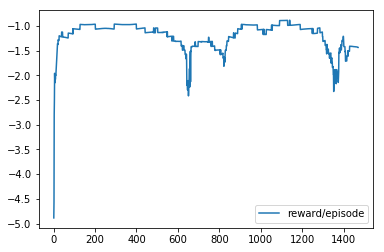

In [216]:
## TODO: Plot the rewards.
from mydata import myResults 
import matplotlib.pyplot as plt
%matplotlib inline

#AGENT_NAME = "goto_test3" #Datafilenames are based on this name
myrewards = myResults(AGENT_NAME + '_train', loadfile=True)
plt.plot(myrewards.episodes, myrewards.rewards, label='reward/episode')
plt.legend()
_ = plt.ylim()

## Prediction (Simulation):

In [209]:
#1) Initiate the task and its parameters:
#runtime =  60                               # time limit of the episode
#init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
#target_pos = np.array([1, 2, 10.]) # Target Position 
#mytask = TaskController(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
#mytask.operation = 'goto' #other options: 'takeoff', 'hover', 'goto'

#NOE BEFORE LOADING:
#1) make sure the correct hiddenn_layer function in actor and critic is selected. This is the network I used originaly to save the weigths


# Prediction/simulation. Run this to record the simulation data
#AGENT_NAME = "goto_test7" #Datafilenames are based on this name
Quadcopter(task=mytask, agent_name=AGENT_NAME)



Episode =    1, score =  -1.434 (best =  -0.082 , worst =  -1.434) Rewards:   -0.082,  -0.082,  -0.082,  -0.083,  -0.083,  -0.085,  -0.086,  -0.087,  -0.089,  -0.090,  -0.092,  -0.094,  -0.096,  -0.099,  -0.101,  -0.103,Saving sim_results, error: None


## Load Simulation Results To Plot:
Run the code below to LOAD the simulation data from files if needed. 


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


from mydata import myResults, mySimulationResults 

class PlotResults:
    def __init__(self, agent_name):
        self.agent_name = agent_name
        self.load_results_file()
        
        self.training_rewards = myResults(agent_name + '_train', loadfile=True)
    
    def plot_episode_rewards(self):
        plt.plot(self.training_rewards.episodes, self.training_rewards.rewards, label='reward/episode')
        plt.legend()
        _ = plt.ylim()

    def load_results_file(self):
        sim_results = mySimulationResults(self.agent_name + '_simulation', loadfile=True)
        i_episode = 1 #Can save simulation for several episodes if I chose to. Therefore, i must say which episode to view. 
        self.results = sim_results.get_simulationdata(i_episode-1) 
    
    def plot_position(self):
        print("Plots the Position for: " + self.agent_name)
        plt.plot(self.results.time, self.results.x_pos, label='x')
        plt.plot(self.results.time, self.results.y_pos, label='y')
        plt.plot(self.results.time, self.results.z_pos, label='z')
        plt.legend()
        _ = plt.ylim()

    def plot_velocity(self):
        print("Plotting Velocity for: " + self.agent_name)
        plt.plot(self.results.time, self.results.x_velocity, label='x_velocity')
        plt.plot(self.results.time, self.results.y_velocity, label='y_velocity')
        plt.plot(self.results.time, self.results.z_velocity, label='z_velocity')
        plt.legend()
        _ = plt.ylim()

    def plot_euler_angles(self):
        print("plot the euler angles (the rotation of each axis) for the: " + self.agent_name)
        plt.plot(self.results.time, self.results.x_euler_angle, label='X Angle')
        plt.plot(self.results.time, self.results.y_euler_angle, label='Y Angle')
        plt.plot(self.results.time, self.results.z_euler_angle, label='Z Angle')
        plt.legend()
        _ = plt.ylim()
    
    def plot_angular_velocity(self):
        print("plotting the velocities (in radians per second) corresponding to each of the Euler angles for: " + self.agent_name)
        plt.plot(self.results.time, self.results.x_angular_velocity, label='x')
        plt.plot(self.results.time, self.results.y_angular_velocity, label='y')
        plt.plot(self.results.time, self.results.z_angular_velocity, label='z')
        plt.legend()
        _ = plt.ylim()
    
    def plot_rotors(self):
        print("Plotting Rotors for: " + self.agent_name)
        plt.plot(self.results.time, self.results.rotor_speed1, label='Rotor 1 rev/sec')
        plt.plot(self.results.time, self.results.rotor_speed2, label='Rotor 2 rev/sec')
        plt.plot(self.results.time, self.results.rotor_speed3, label='Rotor 3 rev/sec')
        plt.plot(self.results.time, self.results.rotor_speed4, label='Rotor 4 rev/sec')
        plt.legend()
        _ = plt.ylim()
    

# Test Results

I have done a few different tests with different parameters and saved the wights and results on the server. In here, I have presented a few of the tons of different tests that I run through. Each test has its own slightly different parameters that I have explained under each test heading. 

Please find the following tests in this section: 
- 'goto_3': trained with a smaller neural network (NN) and it found the destination and received bigger reward values at the end of the training. This one is 'flying' in the simulator.

- 'goto_4': same as above but trained with my medium size NN that I have described below. Target is also set to further away to test.


## Results for Agent: 'goto_3'  * Is it Flying? *

- Using my small neural network hidden layers system (explained below)
- target posision is pretty close to the starting position as shown below.

        runtime = 6                                # time limit of the episode
        init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
        target_pos = np.array([1, 1, 6]) # Target Position 
        mytask.operation = 'goto' 
    
        AGENT_NAME = "goto_3_keep" #to load and save data


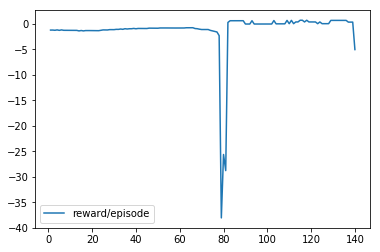

In [190]:
goto_test3 = PlotResults('goto_3_keep')
goto_test3.plot_episode_rewards()

Plots the Position for: goto_3_keep


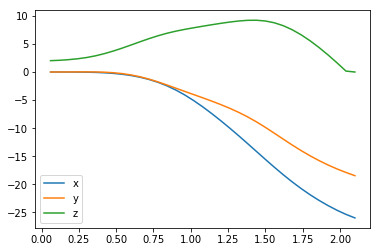

In [191]:
goto_test3.plot_position()

Plotting Velocity for: goto_3_keep


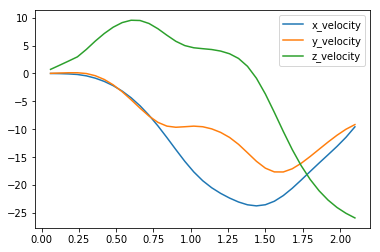

In [192]:
goto_test3.plot_velocity()

plot the euler angles (the rotation of each axis) for the: goto_3_keep


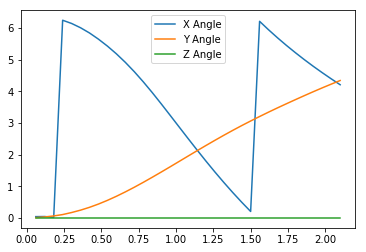

In [193]:
goto_test3.plot_euler_angles()

plotting the velocities (in radians per second) corresponding to each of the Euler angles for: goto_3_keep


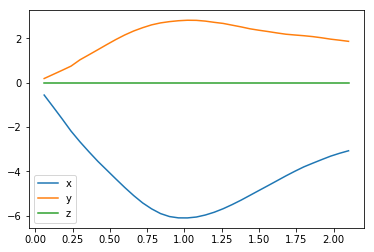

In [194]:
goto_test3.plot_angular_velocity()

Plotting Rotors for: goto_3_keep


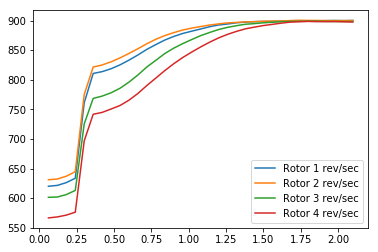

In [195]:
goto_test3.plot_rotors()

## Results for Agent: 'goto_4'
Same as goto_3 but with my medium size NN and the following changes

    runtime = 60                                # time limit of the episode
    init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose
    target_pos = np.array([1, 2, 10.]) # Target Position 
    mytask.operation = 'goto' #other options: 'takeoff', 'hover'

    num_episodes = 1100
    AGENT_NAME = "goto_4" #Datafilenames are based on this name


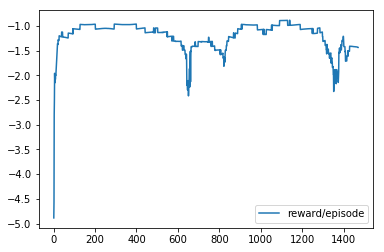

In [210]:
goto_test4 = PlotResults('goto_4')
goto_test4.plot_episode_rewards()

Plots the Position for: goto_4


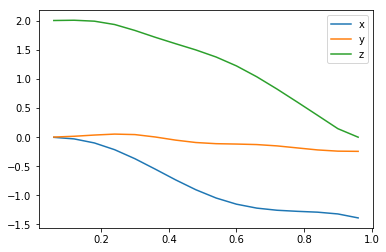

In [211]:
goto_test4.plot_position()

Plotting Velocity for: goto_4


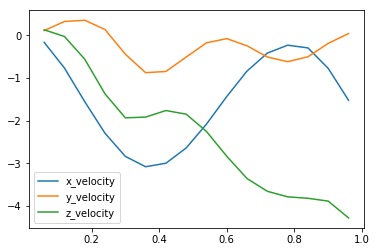

In [212]:
goto_test4.plot_velocity()

plot the euler angles (the rotation of each axis) for the: goto_4


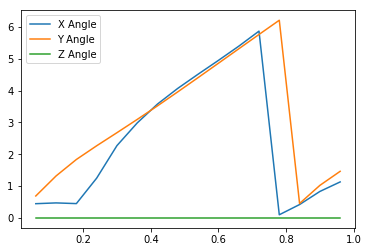

In [213]:
goto_test4.plot_euler_angles()

plotting the velocities (in radians per second) corresponding to each of the Euler angles for: goto_4


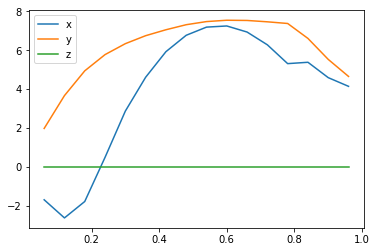

In [214]:
goto_test4.plot_angular_velocity()

Plotting Rotors for: goto_4


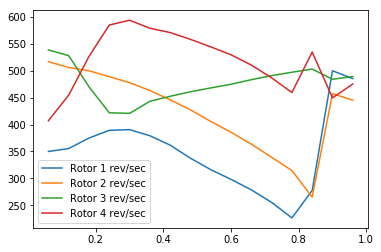

In [215]:
goto_test4.plot_rotors()

###### Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

I made one single class called 'taskcontroller' which is the parent class to 'task'. The 'taskcontroller' class has a variable called operation and based on the given operation key such as 'goto', 'takeoff' etc, it will calculate the reward for the type of operation. For this exercise, to save time, I have only tested the "goto" operation that will move the object to a target position. 

My reward is based on the following: 

- reward -= distance_to_target (I'm using np.linalg.norm(position - target) to calculate the distance to the target position)
- In order to avoid exploding gradients etc, i wanted to keep the rewards between -1 to 1. That is why i used reward -= tanh(distance). Rewards will have bigger variations when the distance is closer to the target and they will be close to -1 when the distance is further away.
- and since it's a 'goto' operation, when the object is closer to target than a given threshold, that in this case is (distance < 2), I'm adding +1 to the reward and terminating the episode by setting done=True.


Below, please see my reward function in the file taskcontroller.py. And a shorter version follows below.

    #(3) Operation specific reward:
    def reward_goto(self, reward, done):
        dist = self.flightdata.target_distance
        if dist < 2:  # agent is within bonus region? significantly increase reward tanh_distance < 
            reward += 1.0  
            done = True
        return reward, done
      
    #(2): trajectory reward 
    def trajectory_reward(self, reward, done):        
        reward -= np.tanh(self.flightdata.target_distance * LAMBDA)
        return reward, done
    
    #(1): manages all reward calls:
    def calc_rewards(self, done):
        self.vtargetpos.update(self.target_pos[0], self.target_pos[1], self.target_pos[2])
        self.flightdata.update(self.sim, self.vtargetpos) #Uptade all flight positioning info        
        reward = 0
        reward, done = self.trajectory_reward(reward, done)
        reward, done = self.operation_rewards[self.operation](reward, done) #Operations specific reward  
        reward = reward / self.action_repeat #create a small number out of reward. 
        return reward, done  
         
     
        
At the beginning when I started testing, I had my start position at (0,0,3) and my target at (5,5,80). It turned out that the distance was too long and I did never get any +1 rewards (i.e. never found the destination). Therefore my results where very poor to start with. But after many tests, I realised that when I sat the distance target closer to the start position, somthing like (1,1,6), it actually found the destination during training and I started to get the +1 rewards more and more towards the end. Therefore, the result was suddenly much better as shown in goto_3 example. 

So my question for you is what do I need to do to get it to find longer distances to the target? Do I just need to let it train many more episodes so the introduced noise, accidently finds point that is closer to the optimal maximum? so it eventually finds the target? 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I'm using the Deep Deterministic Policy Gradients (DDPG). I tried several learning parameters, regularisation and network sizes. I tested with two different network sizes. I have picked a few results that I have plotted in this document, that you can find above.

In my description above, I have referred to a small, medium and large hidden layer NN. The reason for that is that I have created 3 functions in a file named 'test_hidden_layers.py'. I did that to be able to easily swap between them in the actor and credit classes so I can test them easily and I can easily load saved weights depending on which one I have enabled.

I did try larger learning rates but ended up using 0.00001. It felt like its working the best.

Also I played with the noise (exploration) variables in the agent class to see if more noise will improve my performance. 

The small size NN is: 

    Dense(units=64) + Dropout(0.04) + ReLu Activation
    Dense(units=128) + Dropout(0.04) + ReLu Activation
    Dense(units=64) + Dropout(0.04) + ReLu Activation
    Actor: ends with Dense(action size) with RandomUniform Weight initialisation + Sigmoid Activation
    Critic: ends with a layer with combined states and actions
    I used Adam optimisers for both actor and critic
    learning rates: 0.00001

The medium size NN is: 

    Dense(units=256) + BatchNorm + L2 Regularisation + ReLu Activation
    Dense(units=512) + BatchNorm + L2 Regularisation + ReLu Activation
    Dense(units=512) + BatchNorm + L2 Regularisation + ReLu Activation
    Actor: Dense(action size) with RandomUniform Weight initialisation + Sigmoid Activation
    Critic: ends with a layer with combined states and actions
    I used Adam optimisers for both actor and critic
    learning rates: 0.00001
    
The large size NN is: 

    Dense(units=800) + BatchNorm + L2 Regularisation + ReLu Activation
    Dense(units=800) + BatchNorm + L2 Regularisation + ReLu Activation
    Dense(units=800) + BatchNorm + L2 Regularisation + ReLu Activation
    Actor: Dense(action size) with RandomUniform Weight initialisation + Sigmoid Activation
    Critic: ends with a layer with combined states and actions
    I used Adam optimisers for both actor and critic
    learning rates: 0.0001
    


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

Well, no, it was not easy at all. There are so many different parameters to tweak and every time I run the training, the results were very different. In general, it looks like that the score is improving rapidly at the beginning but then it stays at a certain level and some times it gets even worse if I train it for too long, for too many episodes... Right now, I’m not sure if it gets stuck in a local optimal or if its something else like the learning rate or regularisation etc. But probably if I spend another few weeks on it, which I will do, I will probably learn a lot more about how to optimise the parameters. However, for now, I think I'm ready to submit this assignment.

I found that the noisiness in the episode/training is sometimes caused by high runtime values because it takes longer time for each episode. I started to use very long runtimes but later I reduced it to 60. maybe I should reduce it even more.

I think most of my time I spend to test different reward mechanism before I found that the code I have right now performed best for the 'go to' operation. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

I think the reinforcement learning in general was the hardest part of this deeplearning course but at the same time the most interesting part. There is lots of tweaking and testing involved that gets too time consuming and frustrating at times. But I did spend the longest time on this assignment because this one was the most fun one. And I was so excited to see the performance of the rotors in simulation goto_3 that you can find above. All 4 rotors learned to increase their rev/sec together which looks awesome :-)

I had to do a little bit of tinkering to put together the code to start with which was great. I found the DDPG classes that were provided as part of the course material was very useful to get started. I used the provided DDPG code and also spent a lot more times on developing some extra code to save my test results so i can easily alternate between different tests. Also the reward function required some tinkering and testing. 

I have still lots of questions and more things that I would like to test like adding rewards for velocity and angular velocity etc. I would love to hear your feedback. 